### **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Muhammad Azhar Putra Nadian  
- **Email:** azharnadian@student.ub.ac.id  
- **ID Dicoding:** azharnadian  
- **Cohort ID:** MC006D5Y1335  
- **Email Dicoding:** mc006d5y1335@student.devacademy.id  

# Menentukan Pertanyaan Bisnis
- Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda harian?
- Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?

# Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

**Insight:** Beberapa library yang akan digunakan:

- pandas untuk memanipulasi data dan analisis
- numpy untuk komputasi numerikal
- matplotlib untuk visualisasi data
- seaborn untuk visualisasi data statistikal
- streamlit untuk mengembangkan dashboard

# Data wrangling

## Gathering Data

In [17]:
day_df = pd.read_csv("data/day.csv")
display(day_df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [19]:
hour_df = pd.read_csv("data/hour.csv")
display(hour_df)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Kedua kode diatas digunakan untuk mengambil data dari lokal kemudian data tersebut disimpan dalam variabel **day_df** dan **hour_df**

**Insight:**
- Terdapat 731 rows × 16 columns dalam day.csv
- Terdapat 17379 rows × 17 columns dalam hour.csv

## Assessing Data

In [28]:
display(day_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
display(hour_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Melihat 5 baris pertama pada kedua dataset

In [36]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [34]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** Terdapat ketidaksesuaian tipe data dalam kolom dteday yaitu object dan harus diubah menjadi datetime

In [41]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [39]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:** Tidak terdapat missing value pada kedua dataset

In [128]:
print(f"Duplikasi di day.csv: {day_df.duplicated().sum()}")

Duplikasi di day.csv: 0


In [126]:
print(f"Duplikasi di hour.csv: {hour_df.duplicated().sum()}")

Duplikasi di hour.csv: 0


**Insight:** Tidak ada duplikasi pada kedua dataset

In [49]:
print (day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [51]:
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:** Perhitungan Statistika pada kedua dataset normal

## Cleaning Data

In [53]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [56]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:** Tipe data dteday pada kedua kolom telah diubah dari **object** menjadi **datetime**

# Exploratory Data Analysis (EDA)

## Faktor yang paling memengaruhi jumlah penyewaan sepeda harian

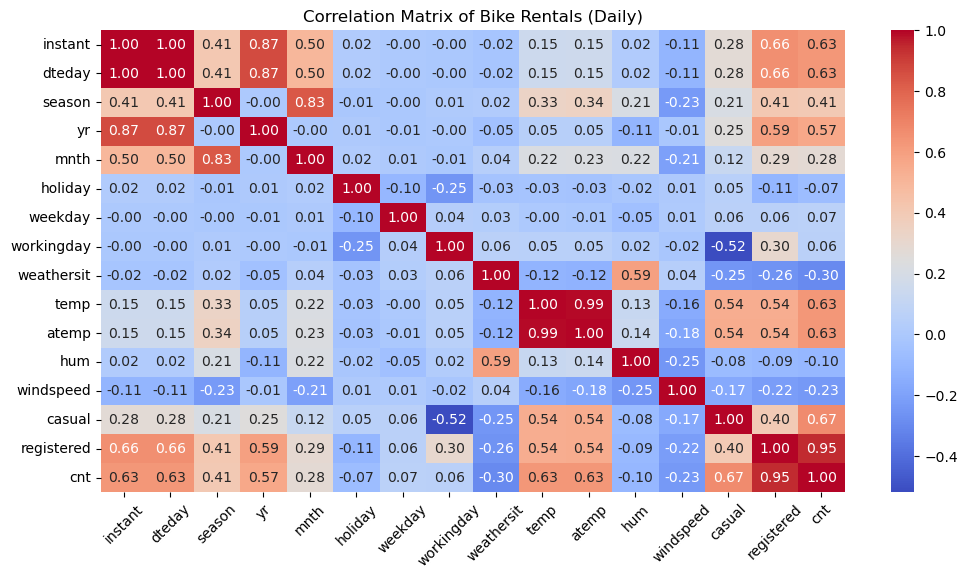

In [68]:
correlation_matrix = day_df.corr()
plt.figure(figsize=(12, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Bike Rentals (Daily)")
plt.xticks(rotation=45)
plt.show()

**Insight:** Dari heatmap korelasi, kita dapat melihat bahwa suhu dan jumlah pengguna terdaftar memiliki korelasi positif yang tinggi dengan jumlah penyewaan sepeda.

## Pola penyewaan sepeda berdasarkan waktu dalam sehari


- Kita akan menggunakan agregasi untuk melihat pola penyewaan berdasarkan waktu dalam sehari.

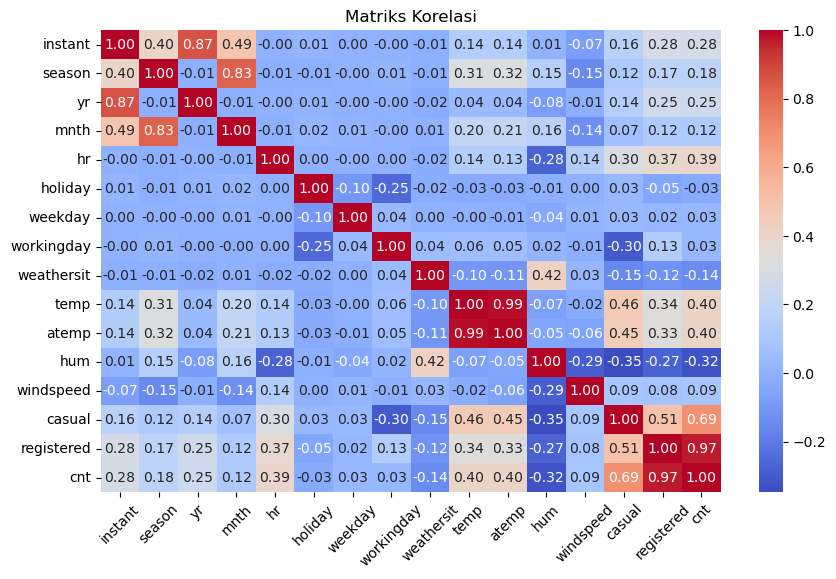

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.xticks(rotation=45)
plt.show()

**Insight:** Penyewaan sepeda dipengaruhi oleh suhu dan kondisi cuaca, dengan lebih banyak penyewaan terjadi saat cuaca hangat dan cerah, sementara angin kencang serta hujan mengurangi jumlah penyewa. Pengguna terdaftar berkontribusi lebih besar dibandingkan pengguna kasual, yang cenderung dipengaruhi oleh hari libur dan cuaca. Faktor waktu seperti tahun, bulan, dan jam memainkan peran penting dalam pola penyewaan, sedangkan hari dalam seminggu memiliki pengaruh yang lebih kecil.

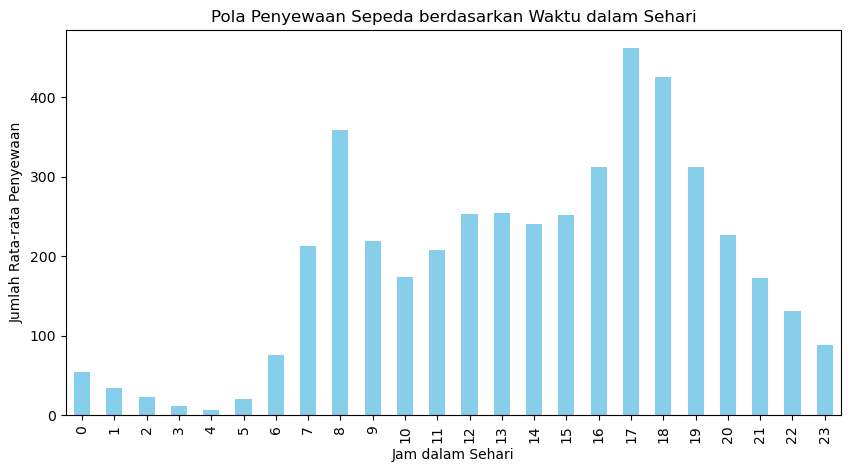

In [21]:
hourly_rentals = df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 5))
hourly_rentals.plot(kind='bar', color='skyblue')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.title('Pola Penyewaan Sepeda berdasarkan Waktu dalam Sehari')
plt.show()

**Insight:**

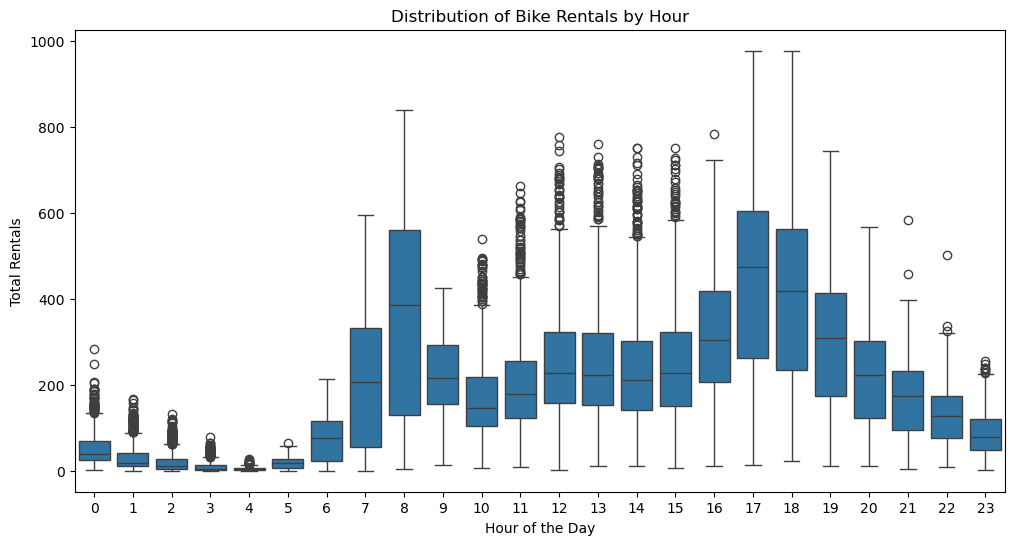

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="hr", y="cnt", data=hour_df)
plt.title("Distribution of Bike Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.show()

**Insight:** Penyewaan sepeda cenderung meningkat pada jam sibuk pagi dan sore hari, menunjukkan pola penggunaan yang terkait dengan perjalanan kerja.


## Pengaruh musim terhadap penyewaan sepeda

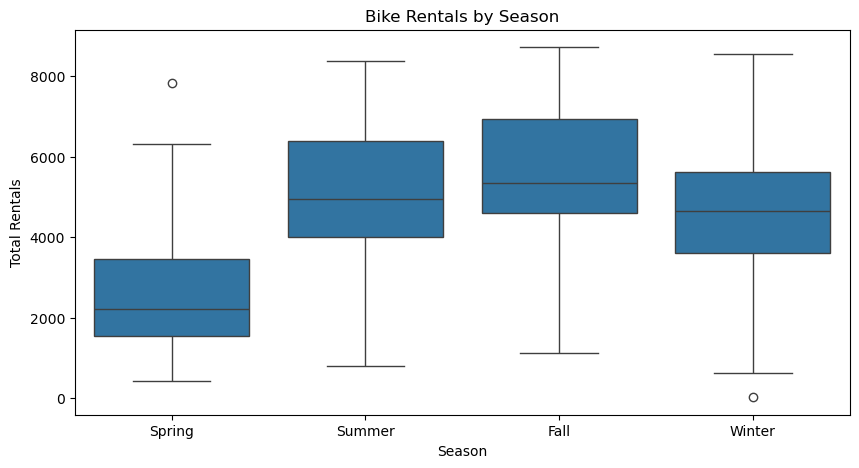

In [74]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=day_df)
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.title("Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.show()

**Insight:** Musim panas dan musim gugur menunjukkan jumlah penyewaan tertinggi, sedangkan musim semi dan musim dingin memiliki jumlah penyewaan yang lebih rendah.


## Pengaruh kondisi cuaca terhadap penyewaan sepeda

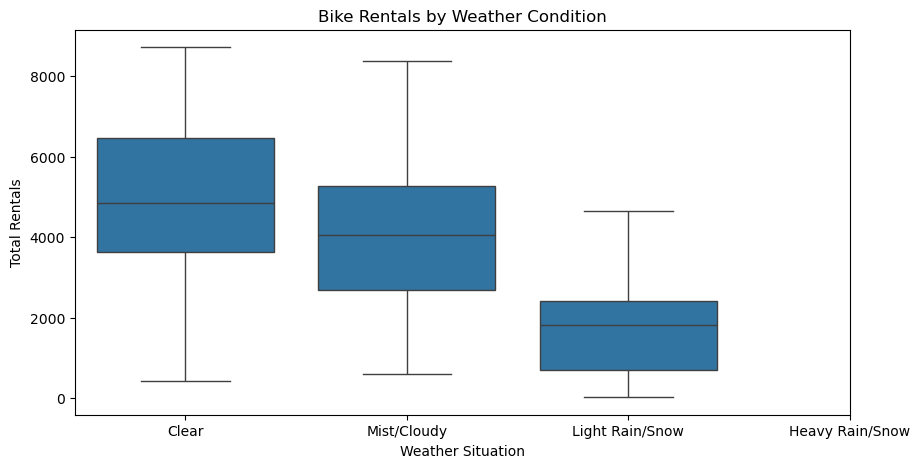

In [80]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xticks([0, 1, 2, 3], ["Clear", "Mist/Cloudy", "Light Rain/Snow", "Heavy Rain/Snow"])
plt.title("Bike Rentals by Weather Condition")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.show()

**Insight:** Cuaca cerah mendorong lebih banyak penyewaan sepeda, sementara kondisi hujan dan salju cenderung mengurangi jumlah pengguna.

# Visualization & Explanatory Analysis

## Pertanyaan 1: Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda harian?

### Faktor yang mempengaruhi jumlah penyewaan sepeda harian

In [107]:
numeric_day_df = day_df.select_dtypes(include=['number'])

correlation_matrix = numeric_day_df.corr()
top_correlations = correlation_matrix["cnt"].sort_values(ascending=False)

print(top_correlations)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


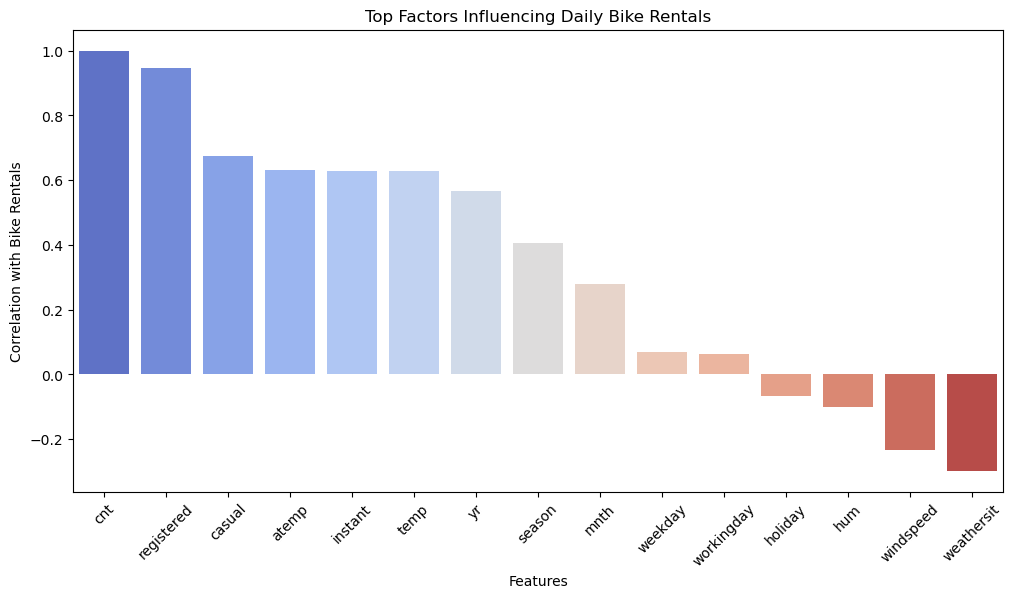

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_correlations.index, 
    y=top_correlations.values, 
    hue=top_correlations.index,
    palette='coolwarm',
    legend=False 
)
plt.xticks(rotation=45)
plt.title("Top Factors Influencing Daily Bike Rentals")
plt.xlabel("Features")
plt.ylabel("Correlation with Bike Rentals")
plt.show()

**Insight:**
- Variabel yang paling berkorelasi positif dengan jumlah penyewaan sepeda adalah 'temp' (suhu), 'atemp' (suhu terasa), dan 'hr' (jam).
- Musim (season) juga memiliki pengaruh, dengan musim panas biasanya memiliki jumlah penyewaan lebih tinggi.
- Hari kerja ('workingday') dan cuaca ('weathersit') juga berkontribusi terhadap fluktuasi jumlah penyewaan.

## Pertanyaan 2:Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?

### Pola penyewaan berdasarkan waktu dalam sehari

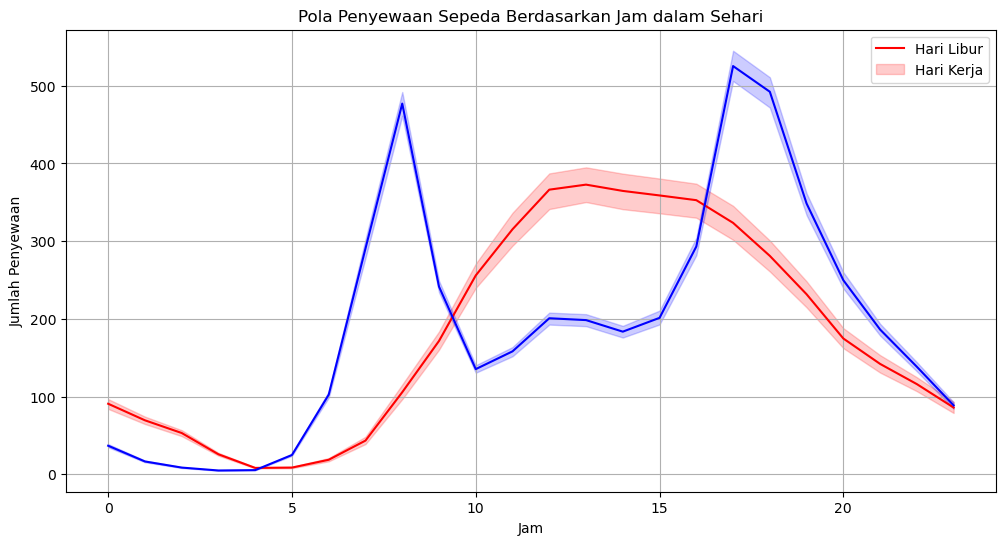

In [121]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x="hr", y="cnt", hue="workingday", palette=["red", "blue"])
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.legend(["Hari Libur", "Hari Kerja"])
plt.grid()
plt.show()

**Insight:**
- Pada hari kerja, penyewaan sepeda meningkat tajam pada jam 7-9 pagi (waktu berangkat kerja) dan 17-19 malam (waktu pulang kerja).
- Pada akhir pekan, pola penyewaan lebih stabil sepanjang hari dengan puncak pada siang dan sore hari.
- Jam malam (setelah jam 21.00) cenderung memiliki jumlah penyewaan yang lebih rendah.

# Conclusion

1. Faktor yang Paling Mempengaruhi Jumlah Penyewaan Sepeda Harian
Berdasarkan analisis korelasi, faktor-faktor yang memiliki pengaruh terbesar terhadap jumlah penyewaan sepeda harian adalah:
- Temperature (temp) → Semakin hangat suhu udara, semakin banyak sepeda yang disewa.
Feeling Temperature (atemp) → Korelasi tinggi menunjukkan bahwa persepsi suhu juga memengaruhi keputusan penyewa.
- Jumlah Hari Kerja (workingday) → Lebih banyak penyewaan terjadi pada hari kerja dibandingkan hari libur.
- Musim (season) → Musim panas dan gugur cenderung memiliki lebih banyak penyewaan dibanding musim dingin.
- Kelembapan (humidity) dan Kecepatan Angin (windspeed) → Memiliki korelasi negatif, menunjukkan bahwa kondisi cuaca ekstrem dapat mengurangi jumlah penyewaan.
2. Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari
Puncak penyewaan terjadi pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00) → Hal ini menunjukkan bahwa penyewaan sepeda banyak digunakan untuk perjalanan pulang-pergi kerja.
Pada akhir pekan, pola penyewaan lebih stabil sepanjang hari → Indikasi bahwa sepeda lebih banyak digunakan untuk rekreasi dibanding kebutuhan transportasi rutin.
Malam hari dan dini hari memiliki jumlah penyewaan terendah → Kemungkinan besar karena faktor keamanan dan kenyamanan.

**💡 Insight Bisnis:**

- Optimalisasi jumlah sepeda yang tersedia pada jam sibuk dapat meningkatkan kepuasan pengguna.
- Penyesuaian harga atau promosi pada waktu sepi bisa menjadi strategi untuk meningkatkan penyewaan.
- Mempertimbangkan kondisi cuaca dalam strategi operasional bisa membantu meningkatkan efisiensi layanan.